In [2]:
import matplotlib.pylab
%matplotlib inline

import pandas as pd
import numpy as np
import json
import os
import re

In [3]:
os.listdir('weather')[-1]

#json_to_df('ny-20161231.json')

'ny-20161231.json'

In [4]:
def json_to_df(file):

    with open("weather/" + file) as text:    
        wJson = json.load(text)
        
        obs = [o for o in wJson["history"]["observations"] if "METAR" in o["metar"]]
        weather = pd.DataFrame.from_records(obs)
        weather["date"] = weather["date"].map(lambda x: x["year"] + "-" +x["mon"] +  "-"+ x["mday"] + " " + x["hour"]+":"+x["min"])
        weather["precipi"] = weather["precipi"].astype(float)
        weather.loc[weather["precipi"] < 0, "precipi"] = 0 
        weather.loc[weather["precipi"] ==  9.99, "precipi"] = 0 
        weather.loc[weather["tempi"] == -9999.0, "precipi"] = np.nan
        #print(weather.columns)
        weather = weather[["date", "rain", "precipi", "tempi"]]
        
        
        
    return weather

In [5]:
weather_files = [f for f in os.listdir("weather") if "ny-" in f]

dfs = list(map( json_to_df, weather_files))


In [6]:
all_weather = pd.concat(dfs, axis=0)

print(all_weather.shape)
all_weather.head()

(73782, 4)


date rain  precipi tempi
0  2013-01-01 00:51    0      0.0  39.0
1  2013-01-01 01:51    0      0.0  37.9
2  2013-01-01 02:51    0      0.0  39.0
3  2013-01-01 03:51    0      0.0  39.0
4  2013-01-01 04:51    0      0.0  39.0

In [8]:
sum(all_weather["tempi"] < -99.0)

TypeError: unorderable types: str() < float()

In [9]:
all_weather["date"] = pd.to_datetime(all_weather["date"])


all_weather["tempi"] = all_weather["tempi"].astype(float)
all_weather[all_weather["tempi"] < -99.0] = np.nan
all_weather["year"] = all_weather["date"].map(lambda x: x.year)
all_weather["month"] = all_weather["date"].map(lambda x: x.month)
all_weather["day"] = all_weather["date"].map(lambda x: x.day)
all_weather["hour"] = all_weather["date"].map(lambda x: x.hour)

all_weather.tail()
print(all_weather.tempi.mean())

56.8919657467


In [10]:
print(sorted(all_weather.tempi.value_counts().index))

[1.8999999999999999, 3.0, 3.2000000000000002, 3.8999999999999999, 5.0, 6.0999999999999996, 6.7999999999999998, 7.0, 8.0999999999999996, 8.5999999999999996, 9.0, 10.0, 10.4, 10.9, 12.0, 12.199999999999999, 12.9, 14.0, 15.1, 15.800000000000001, 16.0, 17.100000000000001, 17.600000000000001, 18.0, 19.0, 19.399999999999999, 19.899999999999999, 21.0, 21.199999999999999, 21.899999999999999, 23.0, 24.100000000000001, 24.800000000000001, 25.0, 26.100000000000001, 26.600000000000001, 27.0, 28.0, 28.399999999999999, 28.899999999999999, 30.0, 30.199999999999999, 30.899999999999999, 32.0, 33.100000000000001, 33.799999999999997, 34.0, 35.100000000000001, 35.600000000000001, 36.0, 37.0, 37.399999999999999, 37.899999999999999, 39.0, 39.200000000000003, 39.899999999999999, 41.0, 42.100000000000001, 42.799999999999997, 43.0, 44.100000000000001, 44.600000000000001, 45.0, 46.0, 46.399999999999999, 46.899999999999999, 48.0, 48.200000000000003, 48.899999999999999, 50.0, 51.100000000000001, 51.79999999999999

In [11]:
final_weather = all_weather.groupby(["year", "month", "day", "hour"]).agg('mean').reset_index()
print(final_weather.precipi.max())
final_weather["rain"] = final_weather["precipi"] > 0
final_weather.head()

10.0333333333


year  month  day  hour  precipi  tempi   rain
0  2013.0    1.0  1.0   0.0      0.0   39.0  False
1  2013.0    1.0  1.0   1.0      0.0   37.9  False
2  2013.0    1.0  1.0   2.0      0.0   39.0  False
3  2013.0    1.0  1.0   3.0      0.0   39.0  False
4  2013.0    1.0  1.0   4.0      0.0   39.0  False

In [ ]:
final_weather.to_csv("nyc_weather.csv")

In [ ]:
#os.listdir('weather')


In [12]:

def getTripsForMonth(month):
    

    citibike = pd.read_csv("downloads/2016{}-citibike-tripdata.csv".format(month))
    citibike.drop(["start station name", "start station name", "start station latitude", "start station longitude",
                  "end station name", "end station name", "end station longitude", "end station latitude", "bikeid", "usertype", "birth year", "gender"], axis=1, inplace=True)
    
    citibike["date"] = citibike["starttime"].map(lambda x: re.search('\d\/(.*)\/\d', x).group(1)).astype(int)
    citibike["hour"] = citibike["starttime"].map(lambda x: re.search(' (.*):\d\d:', x).group(1)).astype(int)

    
    return citibike

In [13]:


#= citibike["starttime"].map()
thisMonth = "05"
citibike = getTripsForMonth(thisMonth)
max_day = citibike.date.max()
citibike.head()

tripduration          starttime           stoptime  start station id  \
0           538  5/1/2016 00:00:03  5/1/2016 00:09:02               536   
1           224  5/1/2016 00:00:04  5/1/2016 00:03:49               361   
2           328  5/1/2016 00:00:14  5/1/2016 00:05:43               301   
3          1196  5/1/2016 00:00:20  5/1/2016 00:20:17              3141   
4           753  5/1/2016 00:00:26  5/1/2016 00:13:00               492   

   end station id  date  hour  
0             497     1     0  
1             340     1     0  
2             311     1     0  
3             237     1     0  
4             228     1     0

In [14]:
cluster_info = pd.read_csv("preds/clusters.csv")
cluster_info.head()



ID  end_latitude  end_longitude  ind  cluster
0   72     40.767272     -73.993929    0       18
1   79     40.719116     -74.006667    1        6
2   82     40.711174     -74.000165    2        4
3   83     40.683826     -73.976323    3       11
4  116     40.741776     -74.001497    4        5

In [15]:
def mergeTripsAndClusters(trips, clusters):

    citibike_clusters = trips.merge(clusters, left_on="start station id", right_on="ID")
    citibike_clusters.drop(["start station id",  "ID", "end_latitude", "end_longitude", "ind"], inplace=True, axis=1)
    citibike_clusters.rename(columns={"cluster":"start_cluster"}, inplace=True)

    citibike_clusters = citibike_clusters.merge(clusters, left_on = "end station id", right_on = "ID")
    citibike_clusters.drop(["end station id",  "ID", "end_latitude", "end_longitude", "ind"], inplace=True, axis=1)
    citibike_clusters.rename(columns={"cluster":"end_cluster", "tripduration":"count"}, inplace=True)


    
    return citibike_clusters


In [16]:
cluster_trips = mergeTripsAndClusters(citibike, cluster_info)


# group trips by starting cluster and hour
grouped_out = cluster_trips.groupby(["date" , "hour", "start_cluster"])["count"].agg('count').reset_index()
grouped_in = cluster_trips.groupby(["date" , "hour", "end_cluster"])["count"].agg('count').reset_index()

In [17]:
first_station = grouped_out.loc[grouped_out["start_cluster"] == 1,]
first_station.head()

clusters = grouped_out.start_cluster.unique()
clusters_in = grouped_in.end_cluster.unique()
print(len(clusters), len(clusters_in))

22 23


In [18]:
def fillMissing(cluster, direction = "start_cluster"):
    # add missing dates to a cluster
    
    to_append = []
    for d in range(1, max_day + 1):
        for h in range(0,24):
            if cluster.loc[(cluster["hour"] == h) & (cluster["date"] == d),].shape[0] == 0:
                to_append.append({"date":d, "hour":h, "start_cluster":cluster[direction].values[0], "count":0})
                
    to_append_df = pd.DataFrame(to_append)
    cluster = pd.concat([cluster, to_append_df])
    
    cluster.sort_values(["date", "hour"], axis=0, inplace=True)
    
    cluster["dtstr"] = "2016-{}-".format(thisMonth) + cluster["date"].astype(str) + " " + cluster["hour"].astype(str) +":00:00" 
    cluster["dt"] = pd.to_datetime(cluster["dtstr"])
    cluster.drop(["dtstr"], axis=1, inplace=True)
    return cluster




In [19]:
def do_ar_regression(cluster, lag_weeks=1, predict_threshold=.75, end=False):

    # fill missing hours, check if youre looking for in our outbound trips
    if end:
        cluster = fillMissing(cluster,  "end_cluster")
    else:
        cluster = fillMissing(cluster)
    
    # just get values
    cluster = cluster.set_index('dt')
    cluster = cluster[["count"]]
    
    cutoff = round(cluster.shape[0] * predict_threshold)
   
    # fit model
    ar = ar_model.AR(cluster[:cutoff])
    res = ar.fit(maxlag= lag_weeks * 7 * 24)
    
    #predict
    a = cluster["count"].index[cutoff]
    b = cluster["count"].index[-1]
    print(cutoff, cluster.shape[0], a, b)
    preds = res.predict(a, b)
    preds[preds < 0] = 0
    gold = cluster[cutoff:]["count"].values
    #print(sum(pd.isnull(preds.values)))
    #print(np.log(preds.values))
    rmse = np.sqrt(np.mean((np.log(preds.values + 1) - np.log(gold + 1))**2))
    print(rmse)

    return preds, gold, rmse

def plot_ar_regression(preds, values):
    
    plt.figure(figsize=(10,5))
    plt.plot(values, label="true")
    plt.plot(preds.values, color='r', label='prediction')
    plt.legend()
    
    plt.show()
    return 

cluster  0
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.760848781185


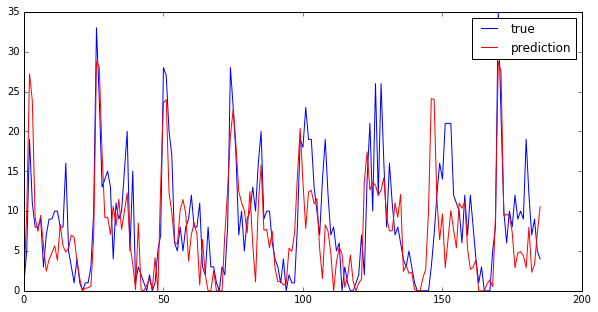

cluster  1
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.875211213522


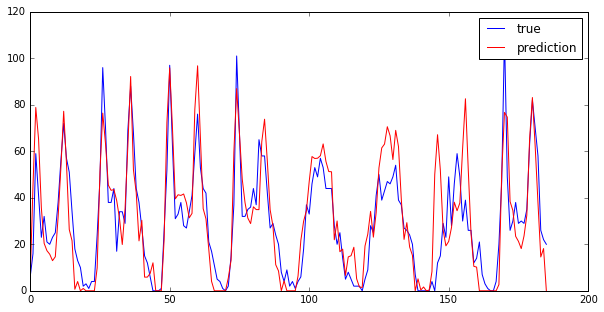

cluster  2
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.780175409827


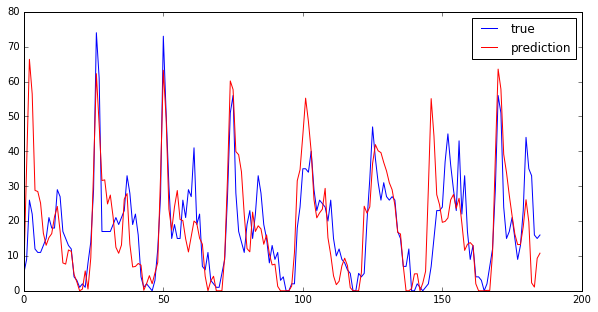

cluster  3
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.13723828927


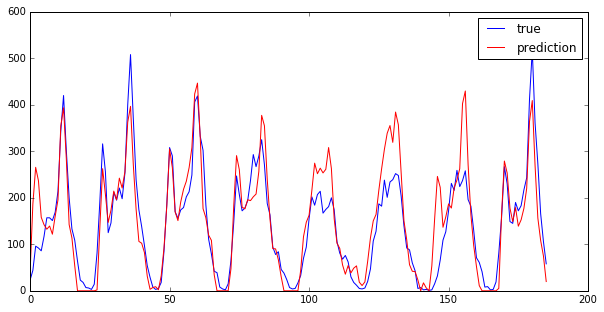

cluster  4
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.14627708295


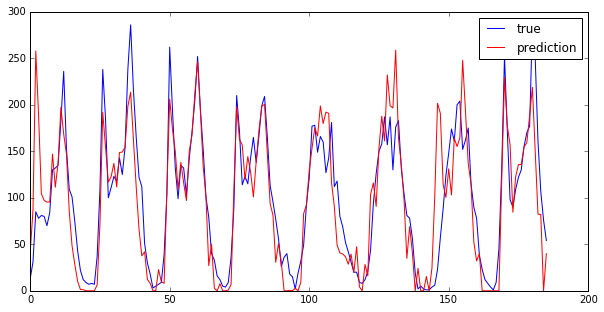

cluster  5
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.24853439572


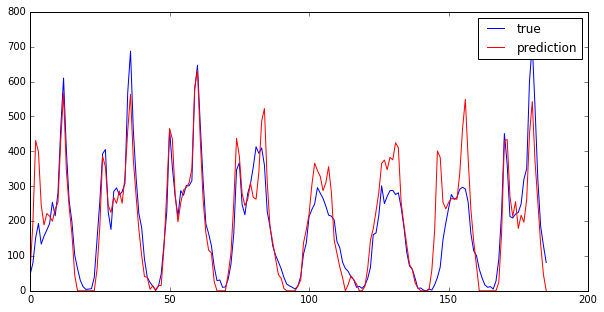

cluster  6
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.48907237189


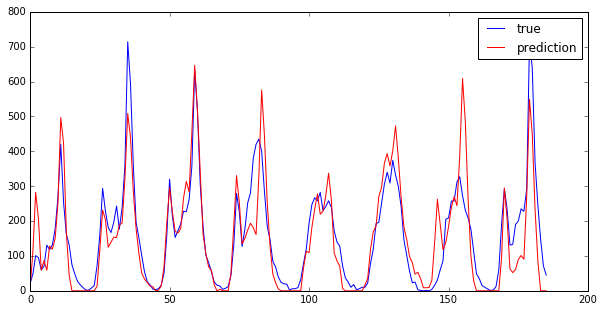

cluster  7
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.13898105699


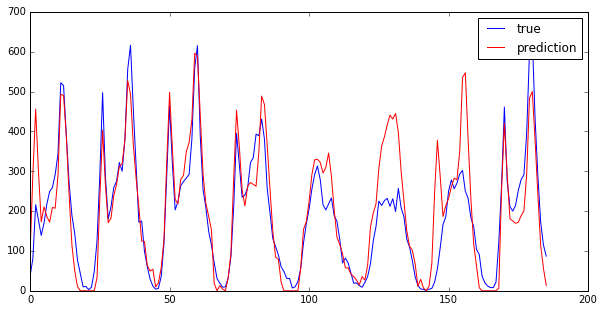

cluster  8
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.848806062794


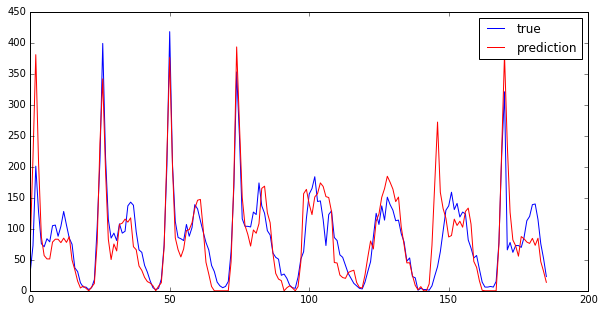

cluster  10
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.29685036007


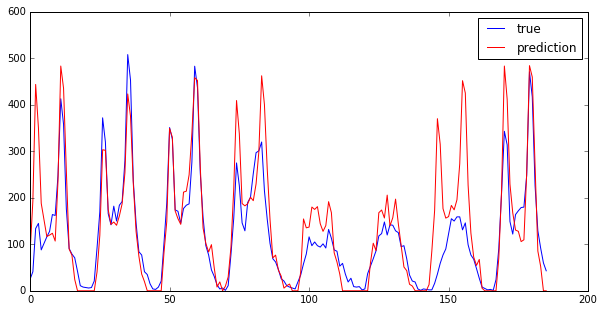

cluster  12
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.775827057844


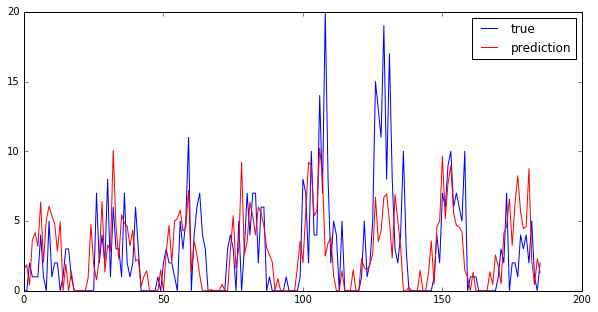

cluster  13
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.889319714731


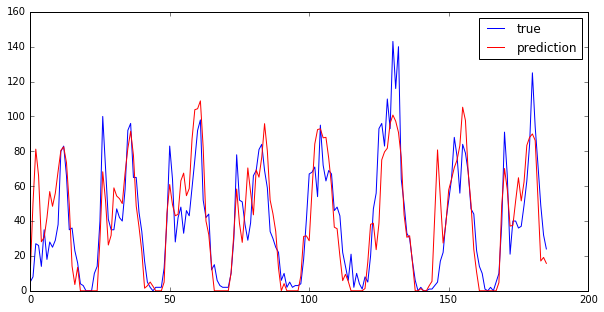

cluster  15
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.832955894578


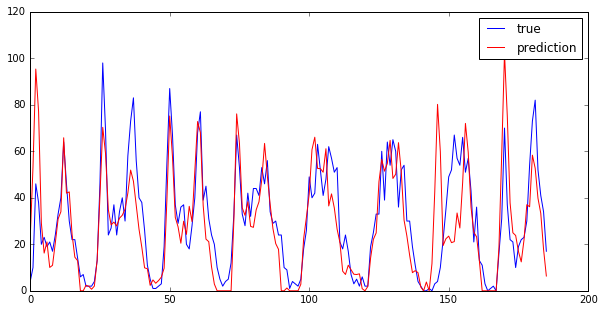

cluster  16
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.711376058397


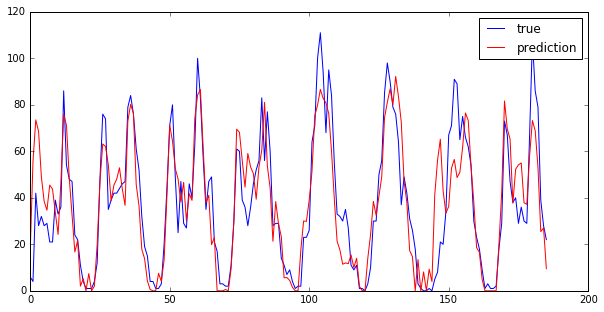

cluster  17
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.593213935784


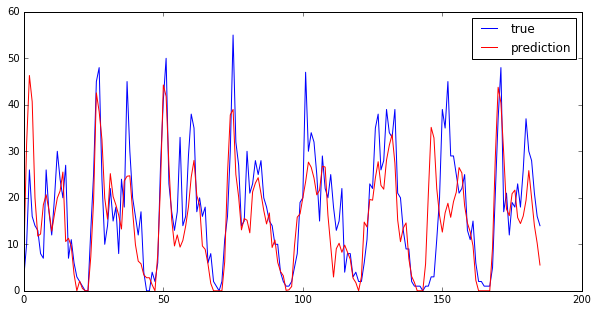

cluster  18
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.47961022426


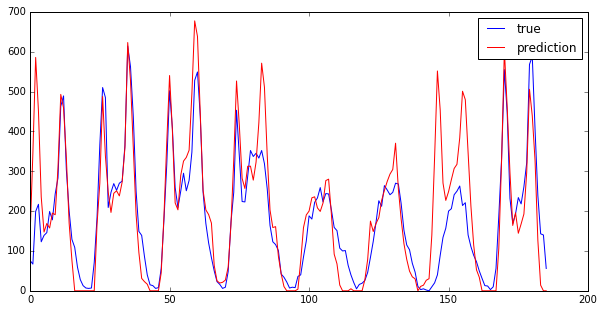

cluster  19
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.976848664764


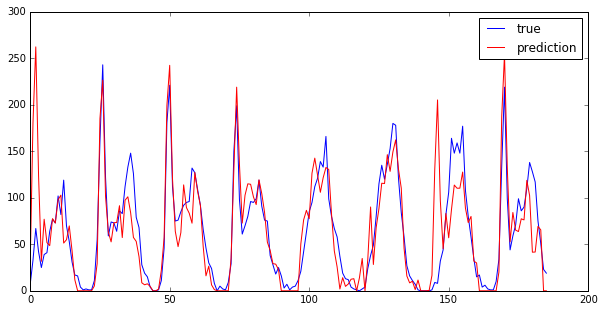

cluster  20
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.2688411817


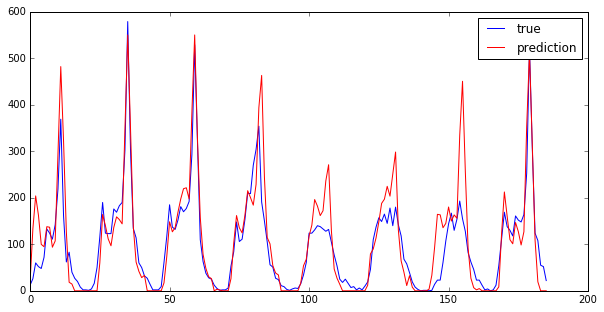

cluster  24
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.10267914245


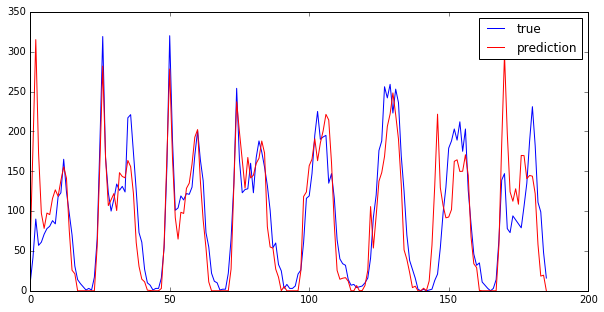

cluster  21
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.804481627774


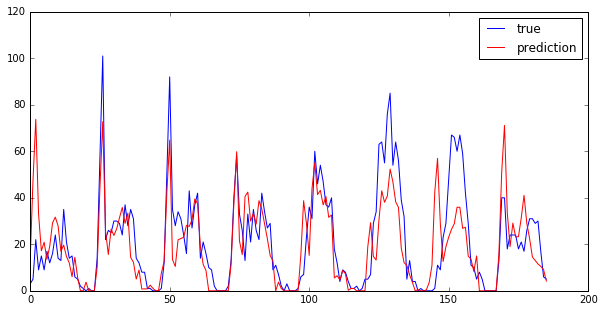

cluster  22
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.809802578364


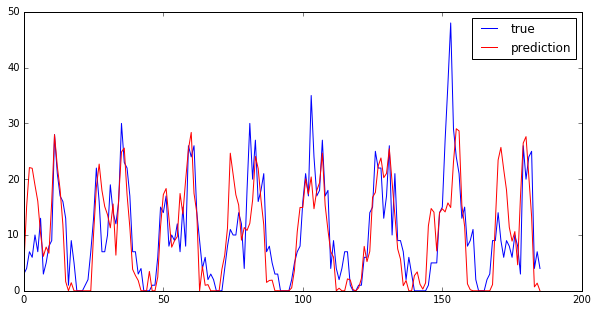

cluster  11
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.877609290123


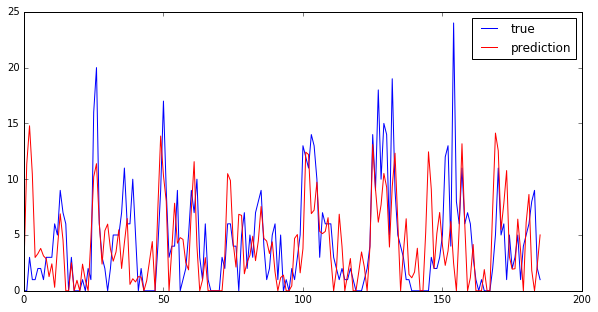

In [71]:
from statsmodels.tsa import ar_model
import matplotlib.pyplot as plt
out_vals = {}
rmses_out = {}
for c in clusters:
    print("cluster ", c)
    station = grouped_out.loc[grouped_out["start_cluster"] == c,]
    preds, gold, rmse = do_ar_regression(station, 1, .75)
    rmses_out[c] = rmse
    out_vals[c] = (preds, gold)
    plot_ar_regression(preds, gold)


cluster  0
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.626518743608


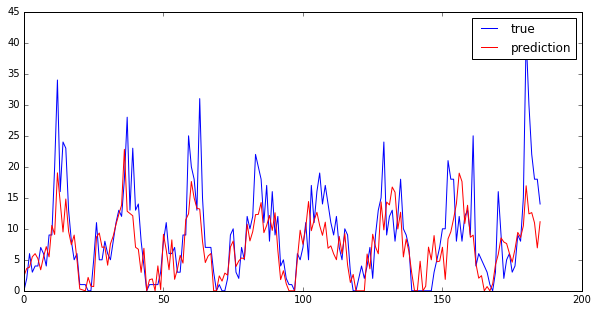

cluster  1
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.955902155884


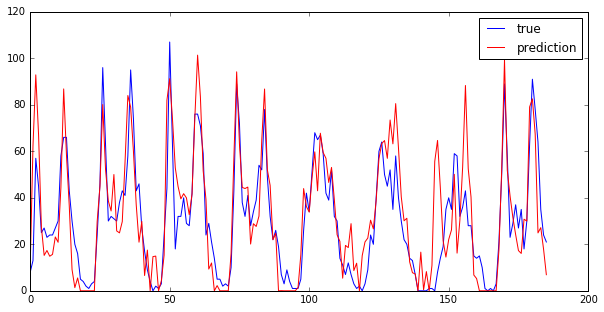

cluster  2
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.662823375346


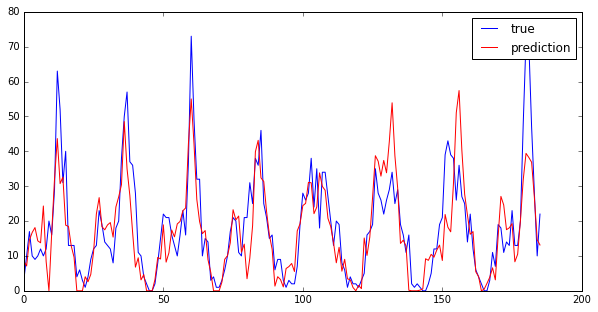

cluster  3
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.089230398


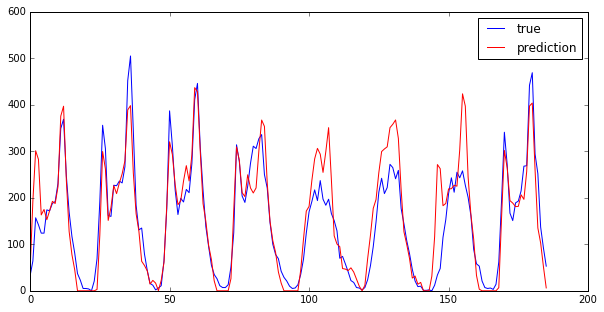

cluster  4
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.06211364195


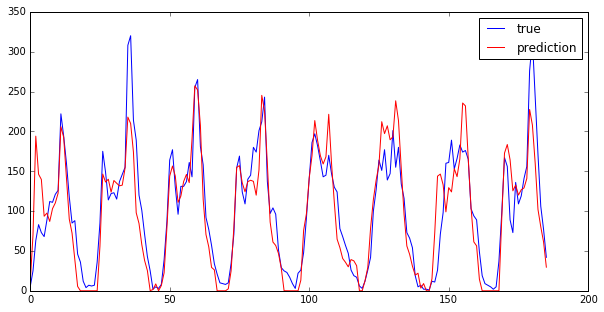

cluster  5
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.31342071057


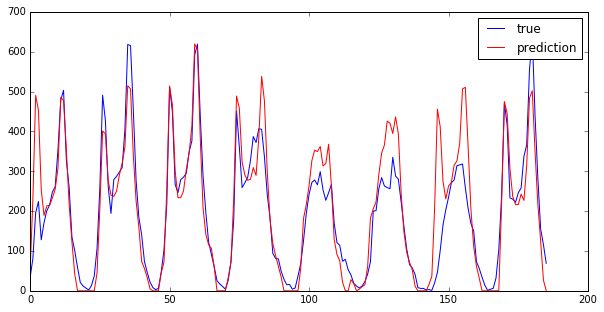

cluster  6
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.49178376934


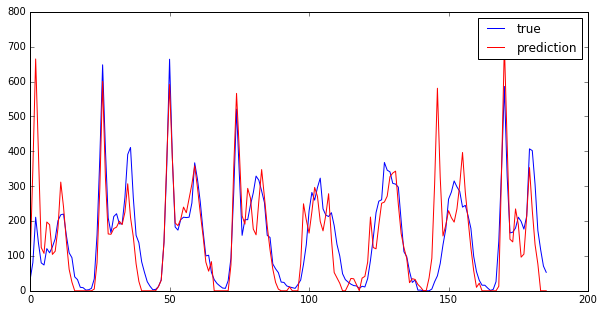

cluster  7
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.1329133654


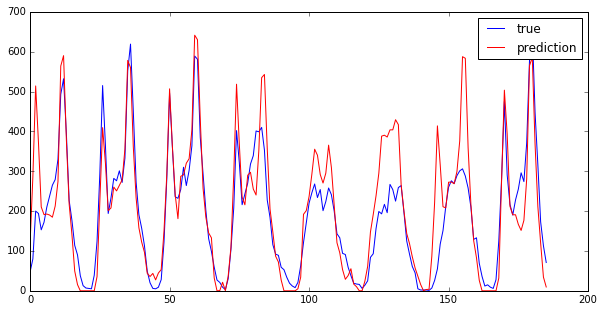

cluster  8
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.976959144191


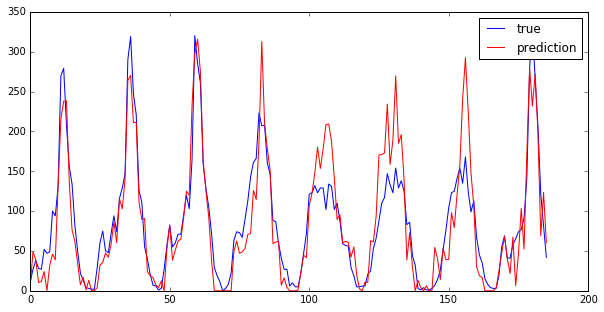

cluster  10
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.19330320059


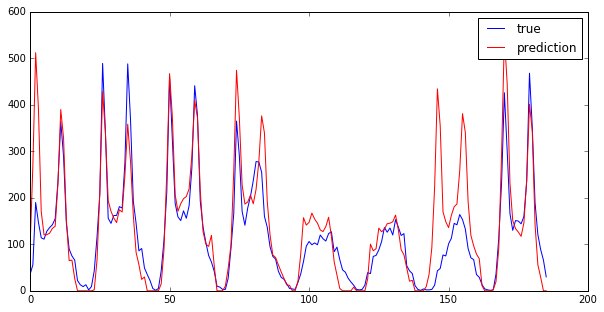

cluster  12
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.677691077746


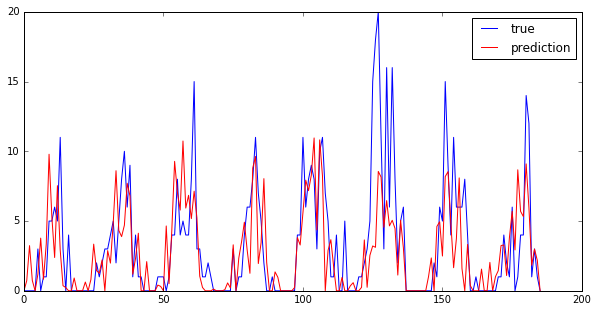

cluster  13
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.05265916635


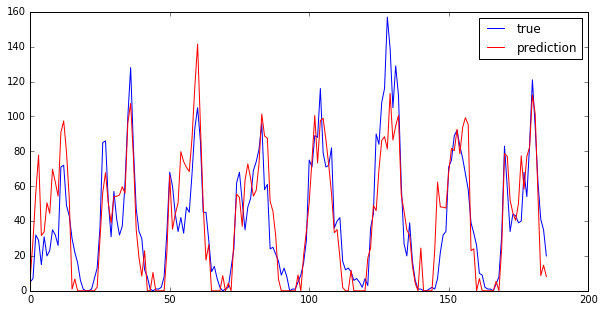

cluster  15
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.656372582688


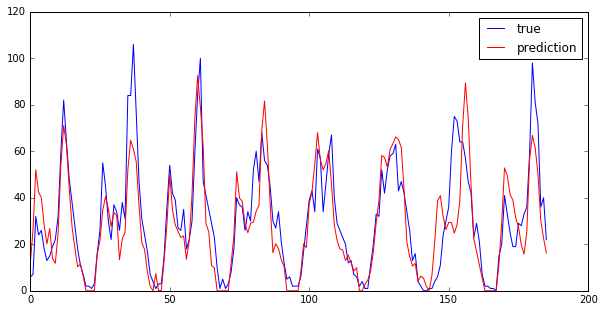

cluster  16
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.688947051073


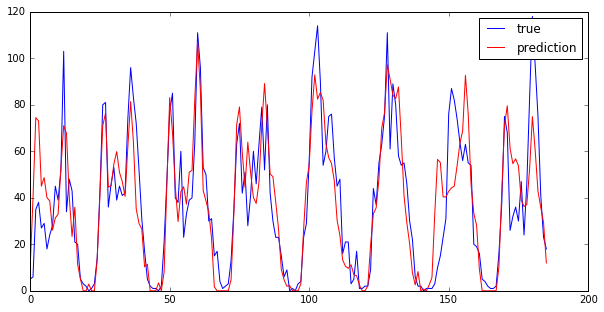

cluster  17
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.604719759893


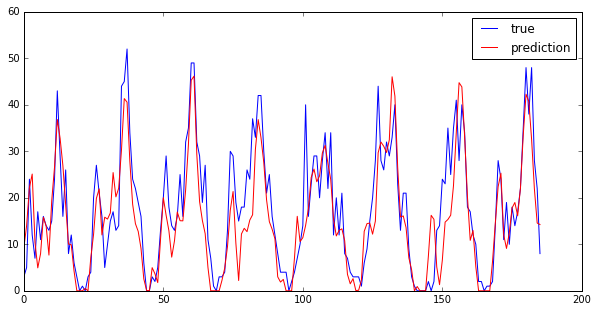

cluster  18
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.4550639584


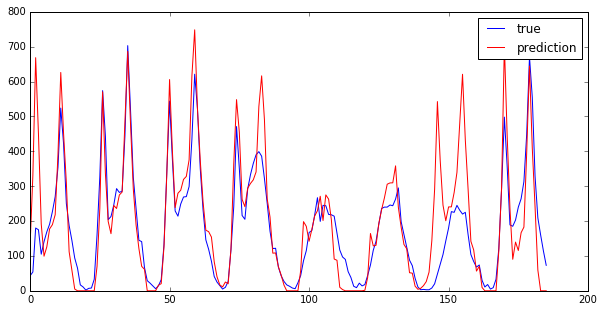

cluster  19
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.975787341706


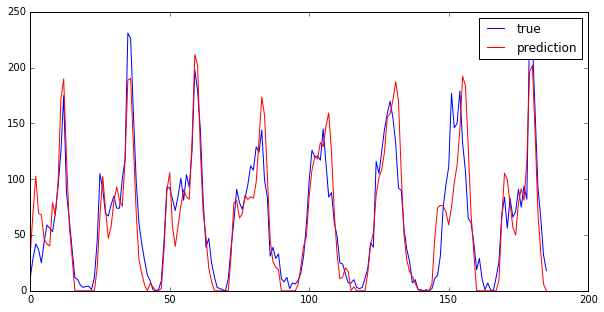

cluster  20
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.26496867114


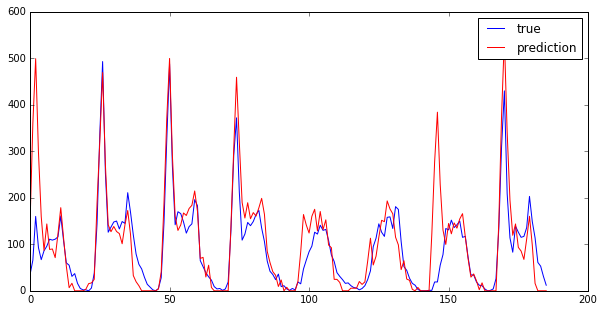

cluster  24
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.07861553675


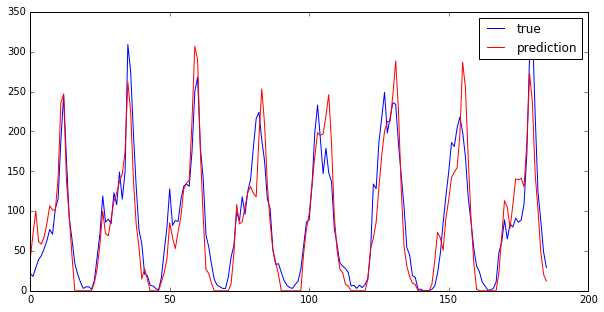

cluster  21
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.711905970675


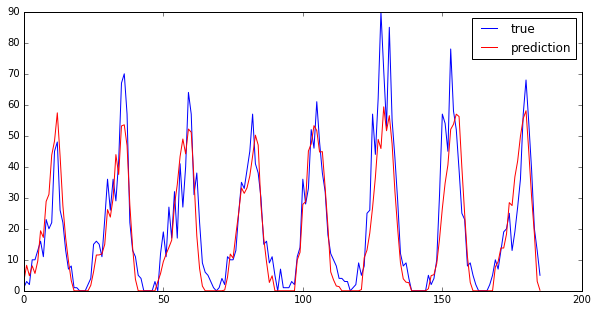

cluster  22
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.78364380222


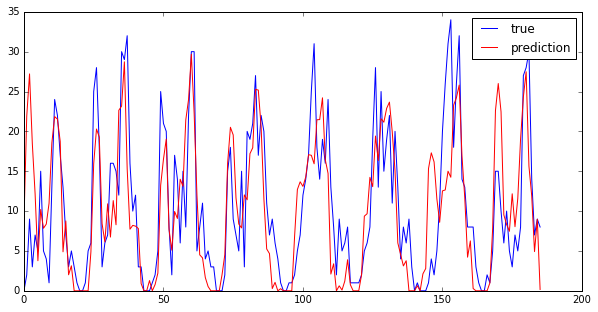

cluster  11
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.749709283764


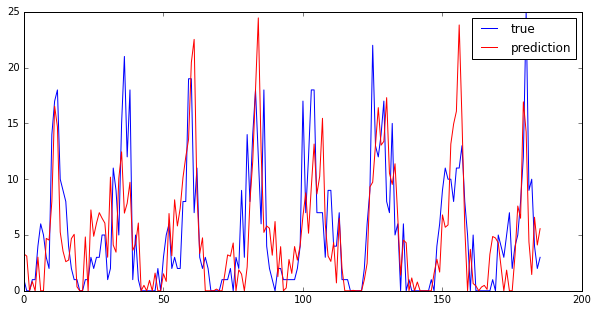

In [72]:
rmses_in = {}
in_vals = {}
for c in clusters:
    print("cluster ", c)
    station = grouped_in.loc[grouped_in["end_cluster"] == c,]
    preds, gold, rmse = do_ar_regression(station, 1, .75, True)
    rmses_in[c] = rmse
    in_vals[c] = (preds, gold)
    plot_ar_regression(preds, gold)

In [73]:
np.mean(list(rmses_in.values()) + list(rmses_out.values()))

0.97840029777856552

In [75]:
#print(in_vals)
all_in_pred = np.concatenate([v[0] for v in in_vals.values()])
all_in_true = np.concatenate([v[1] for v in in_vals.values()])


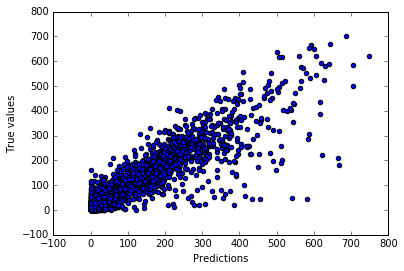

In [78]:
plt.scatter(all_in_pred, all_in_true)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.savefig("cluster_ar_scatter.png")

In [ ]:
def getHourlyRates(in_rates, out_rates, cluster):
    #station_id,weekday,hour,avg(out_count),avg(in_count)
    # times index has time were trying to predict
    #print(in_rates.index)
    vals = []
    for i in range(0, len(in_rates)):
        #vals.append({})
        #print(in_rates[i])
        vals.append({"cluster":cluster, "hour":in_rates.index[i].hour, "weekday":in_rates.index[i].weekday(), "in_rate" :in_rates[i], "out_rate":out_rates[i]})
    #print(vals)
    
    return pd.DataFrame(vals)

cluster_frames = []

for c in clusters:
    print(c)
    cluster_frames.append(getHourlyRates(in_vals[c][0] ,out_vals[c][0], c))

In [ ]:
rates = pd.concat(cluster_frames, axis=0)
rates = rates.drop_duplicates(['cluster', 'hour', 'weekday'])
print(rates.shape)
rates.head(30)

In [ ]:
rates.to_csv("poisson_cluster_ar_preds.csv")

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(first_station['count'][500:].values)
plt.plot(preds.values, color='r')
plt.show()

In [ ]:
grouped["count"].sum()

In [ ]:
np.sqrt(np.mean((preds.values - first_station[500:]["count"].values)**2))

In [ ]:
preds

In [21]:
trips

NameError: name 'trips' is not defined

In [28]:
citibike = getTripsForMonth(thisMonth)
citibike.rename(columns={"tripduration":"count"}, inplace=True)

In [29]:
citibike.head()

count          starttime           stoptime  start station id  \
0    538  5/1/2016 00:00:03  5/1/2016 00:09:02               536   
1    224  5/1/2016 00:00:04  5/1/2016 00:03:49               361   
2    328  5/1/2016 00:00:14  5/1/2016 00:05:43               301   
3   1196  5/1/2016 00:00:20  5/1/2016 00:20:17              3141   
4    753  5/1/2016 00:00:26  5/1/2016 00:13:00               492   

   end station id  date  hour  
0             497     1     0  
1             340     1     0  
2             311     1     0  
3             237     1     0  
4             228     1     0

In [33]:
def fillMissingStation(cluster, direction = "start station id"):
    # add missing dates to a cluster
    
    to_append = []
    for d in range(1, max_day + 1):
        for h in range(0,24):
            if cluster.loc[(cluster["hour"] == h) & (cluster["date"] == d),].shape[0] == 0:
                to_append.append({"date":d, "hour":h, "start station id":cluster[direction].values[0], "count":0})
                
    to_append_df = pd.DataFrame(to_append)
    cluster = pd.concat([cluster, to_append_df])
    
    cluster.sort_values(["date", "hour"], axis=0, inplace=True)
    
    cluster["dtstr"] = "2016-{}-".format(thisMonth) + cluster["date"].astype(str) + " " + cluster["hour"].astype(str) +":00:00" 
    cluster["dt"] = pd.to_datetime(cluster["dtstr"])
    cluster.drop(["dtstr"], axis=1, inplace=True)
    return cluster



def do_ar_regression_station(cluster, lag_weeks=1, predict_threshold=.75, end=False):

    # fill missing hours, check if youre looking for in our outbound trips
    if end:
        cluster = fillMissingStation(cluster,  "end station id")
    else:
        cluster = fillMissingStation(cluster)
    
    # just get values
    cluster = cluster.set_index('dt')
    cluster = cluster[["count"]]
    
    cutoff = round(cluster.shape[0] * predict_threshold)
   
    # fit model
    ar = ar_model.AR(cluster[:cutoff])
    res = ar.fit(maxlag= lag_weeks * 7 * 24)
    
    #predict
    a = cluster["count"].index[cutoff]
    b = cluster["count"].index[-1]
    print(cutoff, cluster.shape[0], a, b)
    preds = res.predict(a, b)
    preds[preds < 0] = 0
    gold = cluster[cutoff:]["count"].values
    #print(sum(pd.isnull(preds.values)))
    #print(np.log(preds.values))
    rmse = np.sqrt(np.mean((np.log(preds.values + 1) - np.log(gold + 1))**2))
    print(rmse)

    return preds, gold, rmse


In [34]:

# group trips by starting cluster and hour
grouped_station_out = citibike.groupby(["date" , "hour", "start station id"])["count"].agg('count').reset_index()
grouped_station_in = citibike.groupby(["date" , "hour", "end station id"])["count"].agg('count').reset_index()

In [35]:

stations = grouped_station_out["start station id"].unique()
stations_in = grouped_station_in["end station id"].unique()

In [36]:
stations

array([  79,  116,  127,  146,  147,  150,  151,  153,  160,  161,  167,
        173,  195,  212,  217,  223,  224,  228,  229,  236,  237,  238,
        247,  250,  251,  252,  254,  257,  258,  263,  265,  267,  276,
        281,  284,  285,  291,  293,  297,  300,  301,  305,  311,  316,
        317,  323,  324,  325,  326,  328,  329,  330,  334,  335,  336,
        345,  347,  348,  349,  352,  354,  355,  358,  359,  361,  364,
        365,  368,  369,  379,  380,  382,  383,  384,  385,  387,  388,
        389,  393,  394,  396,  398,  399,  405,  410,  418,  423,  426,
        428,  432,  433,  434,  435,  437,  438,  439,  441,  444,  445,
        446,  447,  448,  449,  450,  453,  458,  459,  460,  461,  462,
        463,  466,  470,  471,  473,  475,  476,  477,  478,  479,  481,
        483,  484,  485,  486,  487,  488,  490,  491,  492,  494,  496,
        497,  498,  499,  504,  507,  509,  510,  511,  514,  515,  517,
        519,  521,  523,  525,  526,  527,  528,  5

station  79
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.907750271672


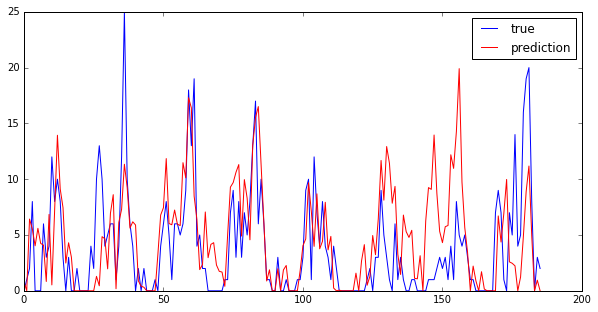

station  116
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.761964805219


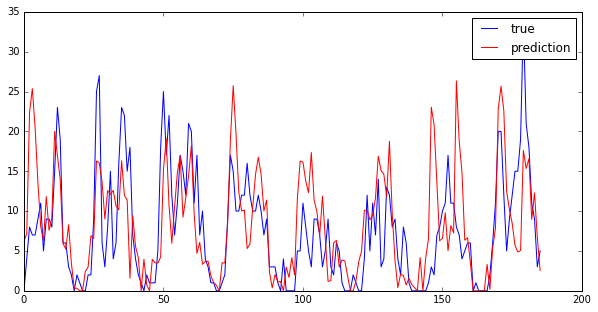

station  127
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.85606170422


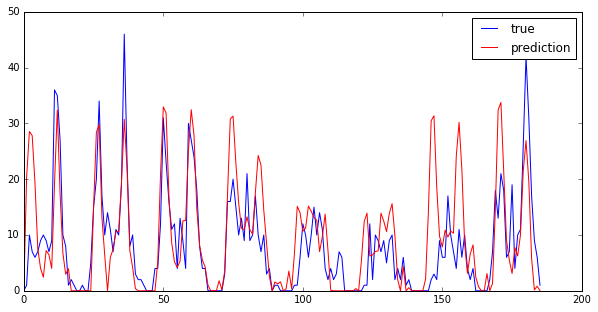

station  146
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.790630391452


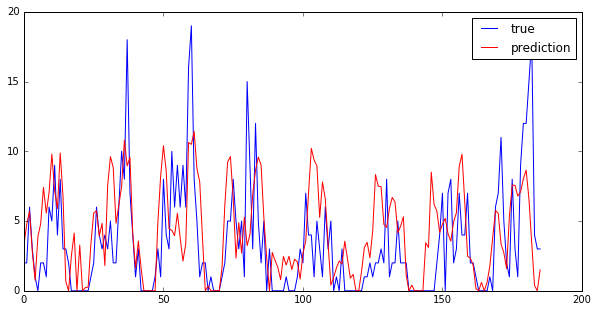

station  147
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.790332871007


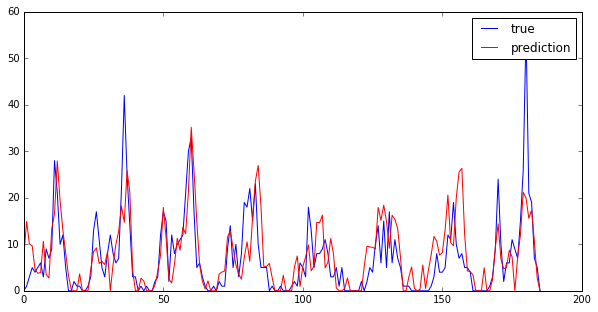

station  150
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.842212390436


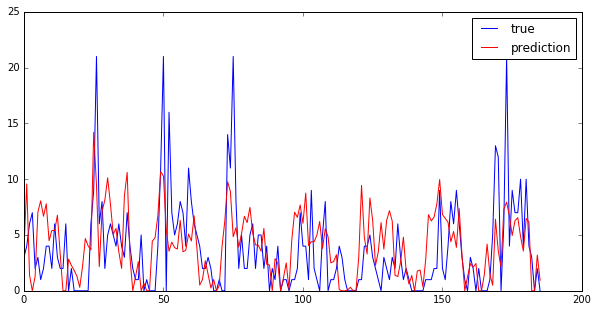

station  151
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.604024893307


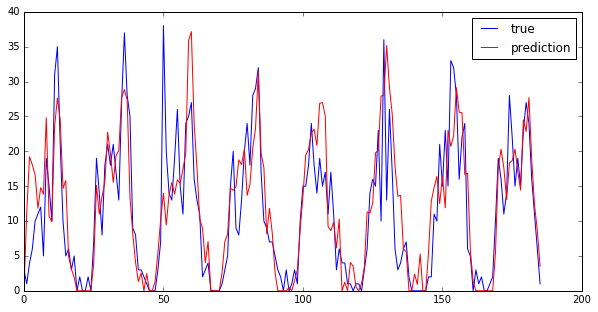

station  153
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.939360705858


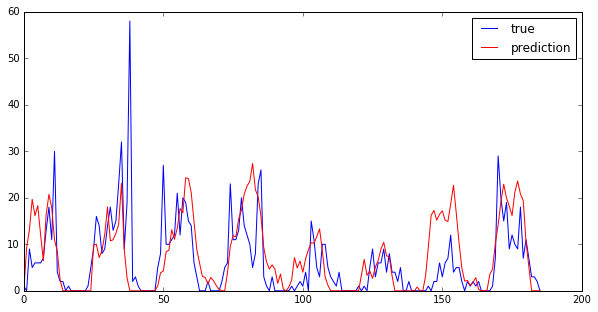

station  160
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.0


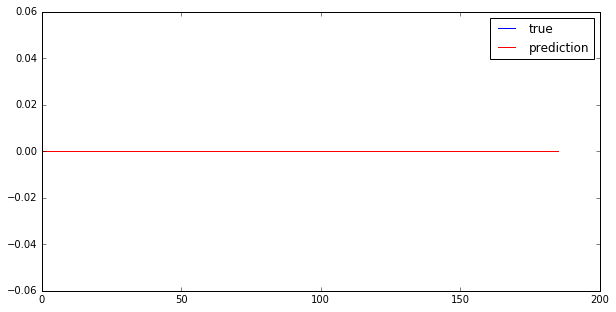

station  161
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.748240360481


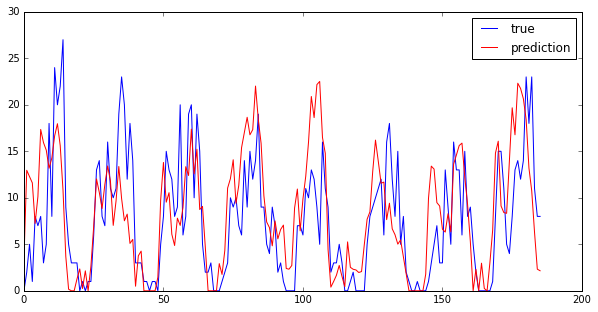

station  167
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.798791269996


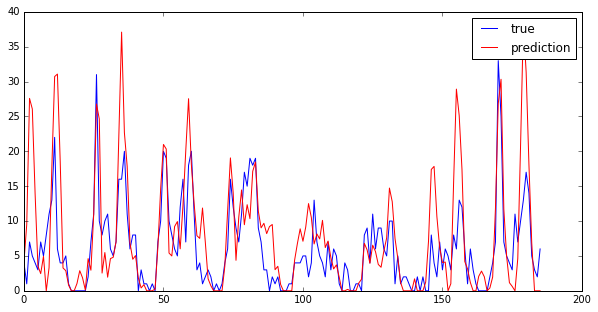

station  173
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.870585388558


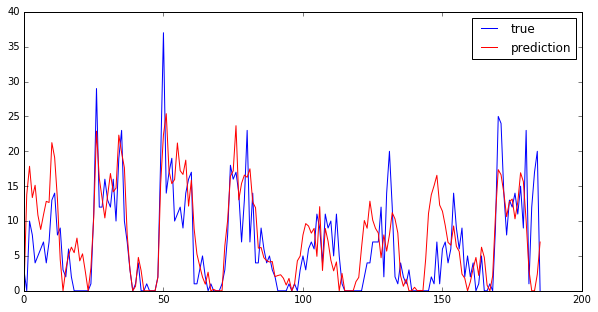

station  195
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.854326887911


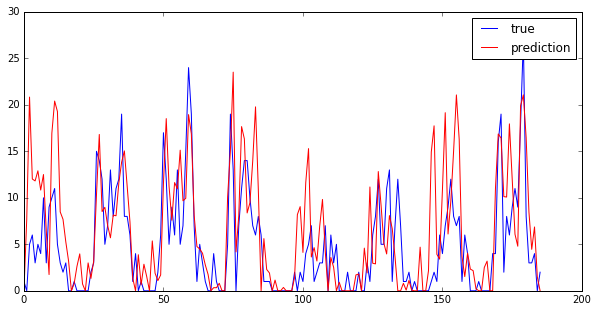

station  212
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.668038692442


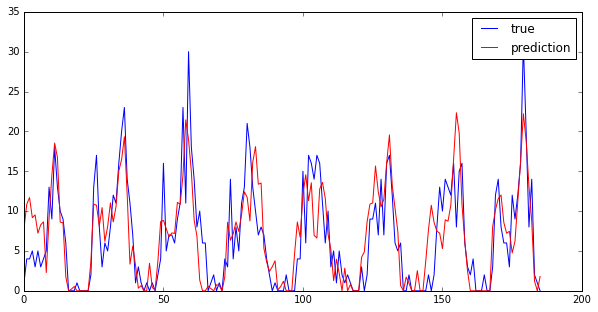

station  217
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.729269579166


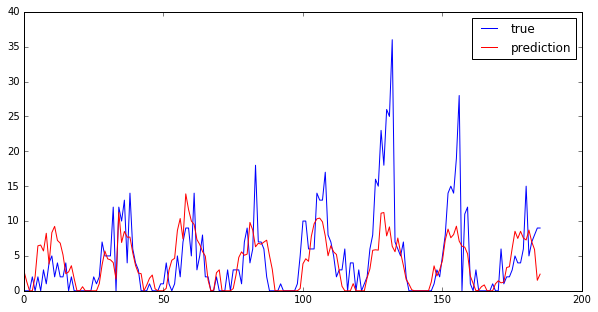

station  223
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.66530483706


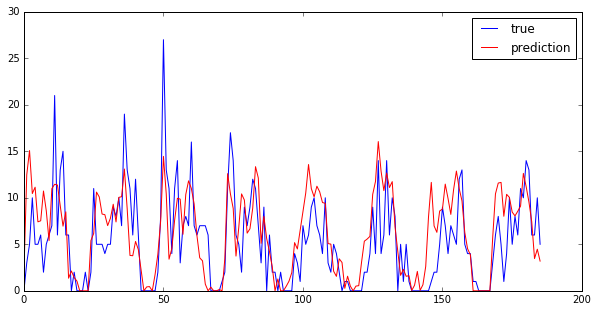

station  224
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.749419264019


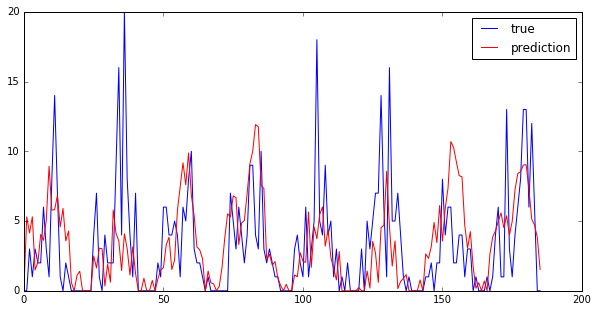

station  228
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.72291729064


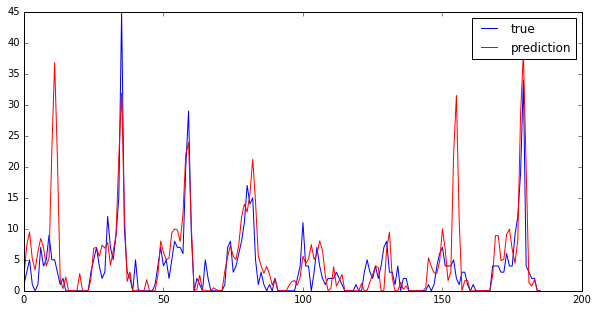

station  229
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.622664641712


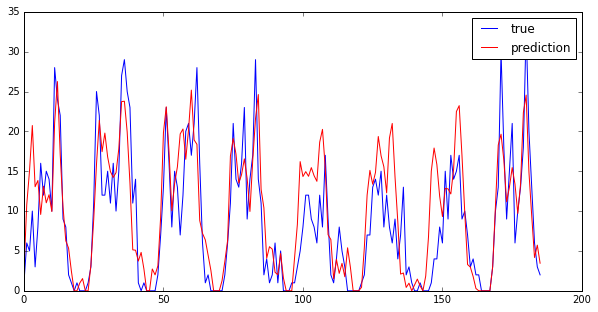

station  236
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
1.16544492709


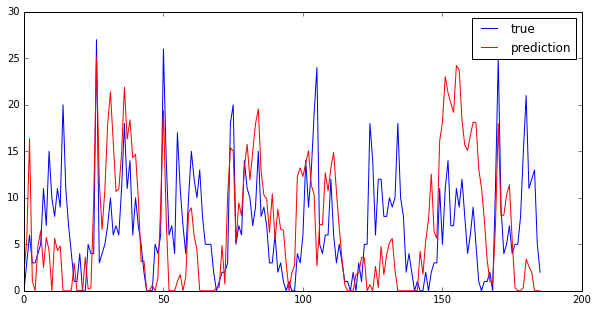

station  237
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.739554703853


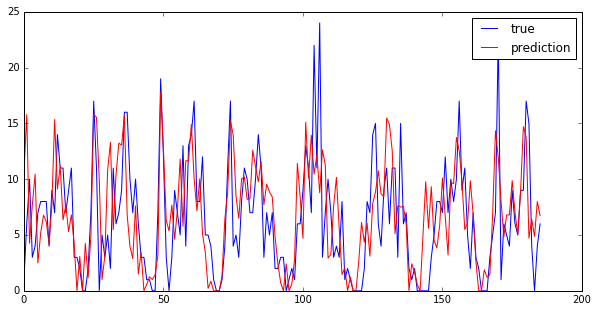

station  238
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.781136019947


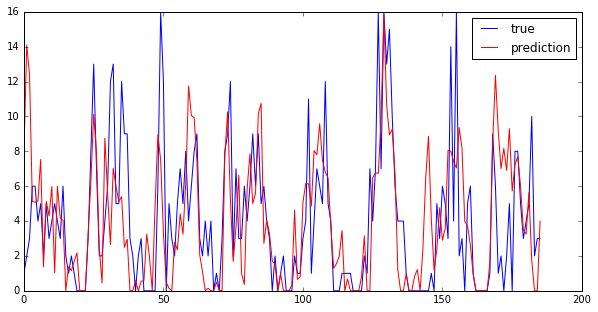

station  247
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.664283396712


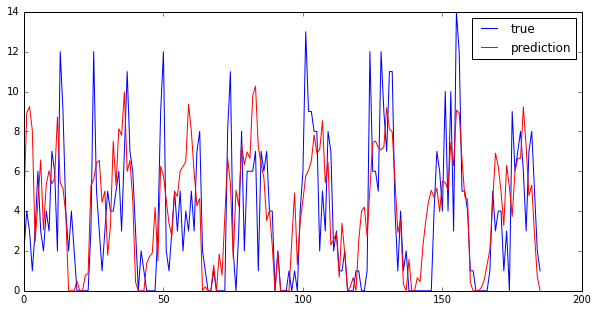

station  250
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.611978869289


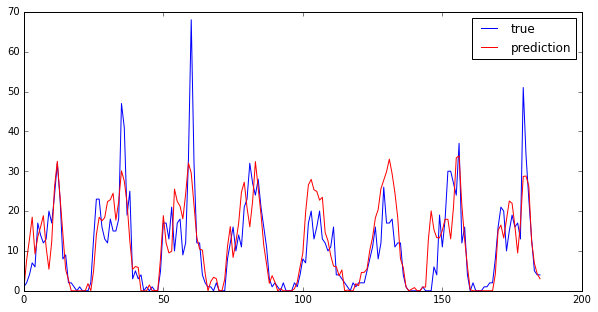

station  251
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.659329963748


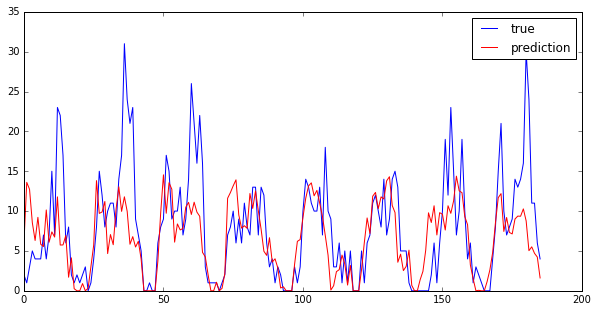

station  252
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.598386664353
station  254
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.719624510534
station  257
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.760290303909
station  258
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.745996734084
station  263
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.575195558909
station  265
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.715777846014
station  267
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.746301112317
station  276
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.818840006098
station  281
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.886819482518
station  284
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.80067565305
station  285
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.77449291386
station  291
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.690886127561
station  293
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.803198432735
station  297
5

In [70]:
from statsmodels.tsa import ar_model
import matplotlib.pyplot as plt
out_stat_vals = {}
rmses_stat_out = {}
count = 0
for s in stations:
    print("station ", s)
    station = grouped_station_out.loc[grouped_station_out["start station id"] == s,]
    preds, gold, rmse = do_ar_regression_station(station, 1, .75)
    rmses_stat_out[s] = rmse
    out_stat_vals[s] = (preds, gold)
    # dont plot everything
    if count < 25:
        plot_ar_regression(preds, gold)
        count = count + 1

station:  79 0
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.834851008391


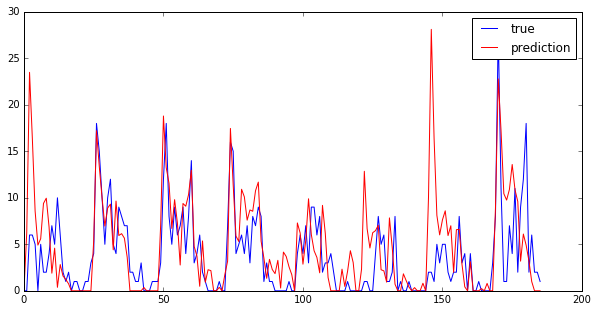

station:  116 1
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.653272132026


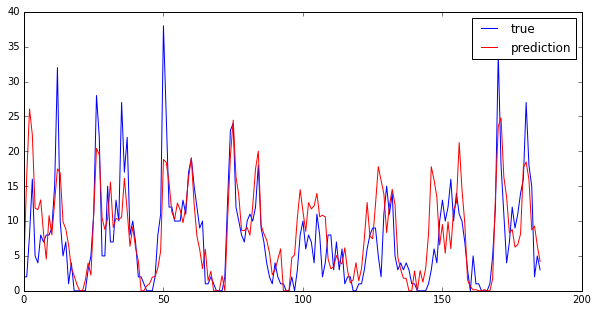

station:  127 2
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.824758678477


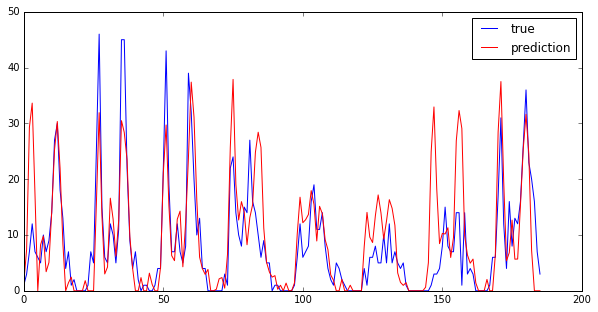

station:  146 3
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.720353635601


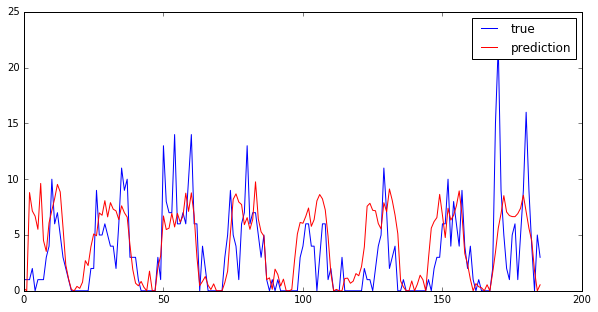

station:  147 4
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.749514079551


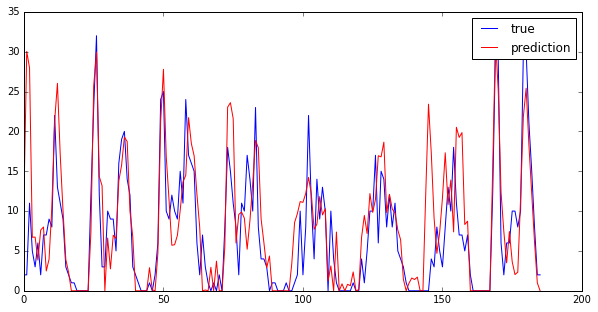

station:  150 5
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.864190847735


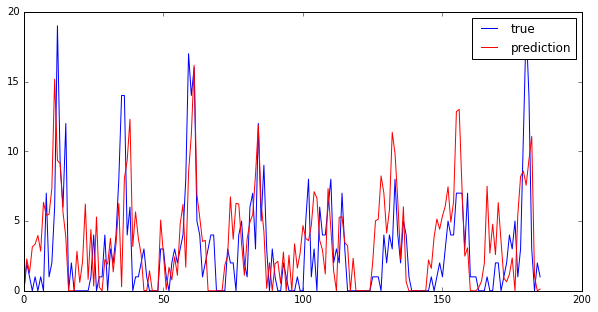

station:  151 6
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.674743527288


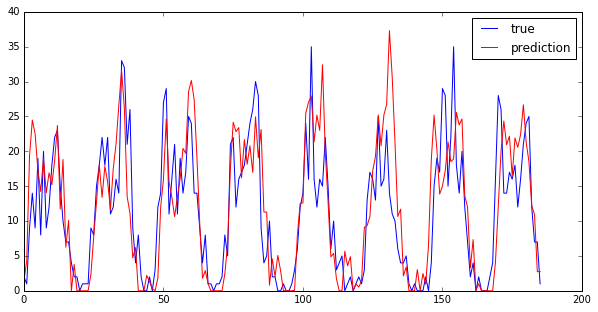

station:  153 7
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.996757753883


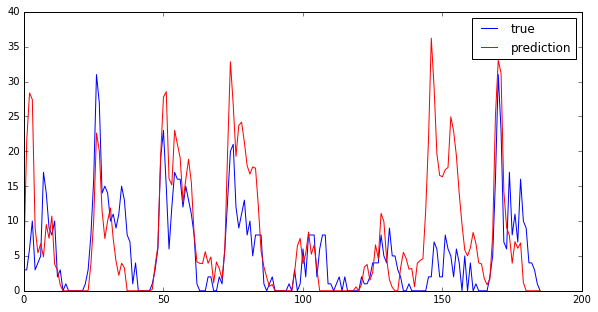

station:  160 8
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.0


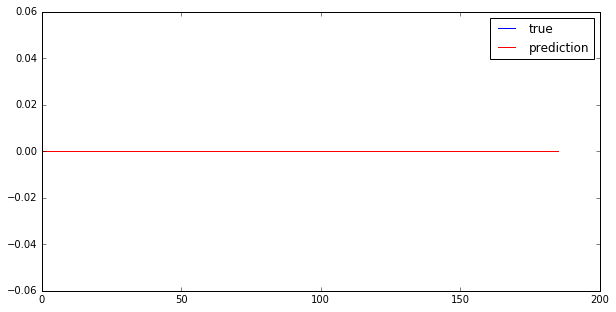

station:  161 9
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.647847936942


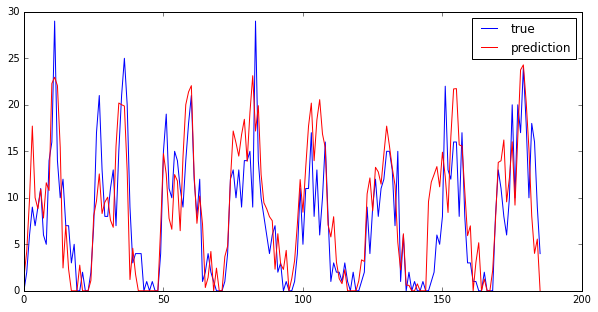

station:  167 10
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.7858531654


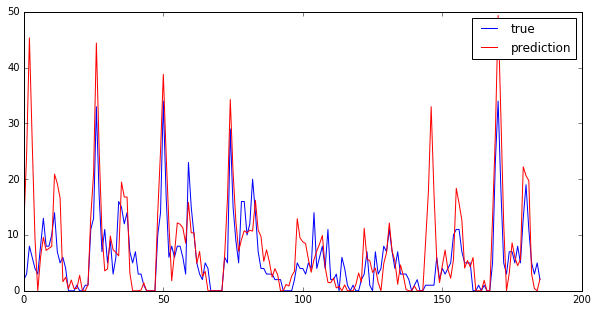

station:  173 11
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.891955747006


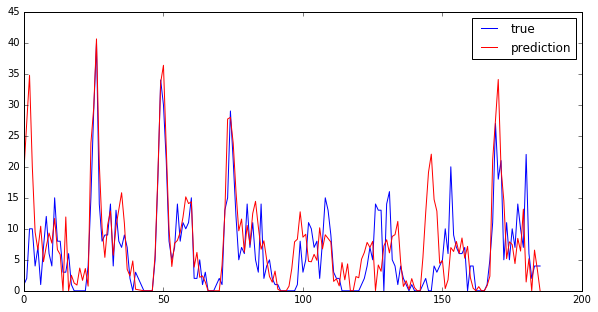

station:  195 12
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.864605364593


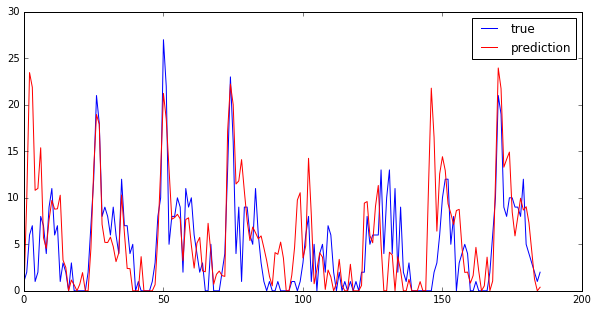

station:  212 13
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.789515465926


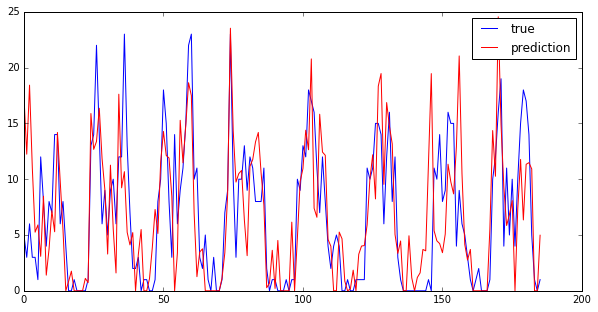

station:  217 14
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.816540530842


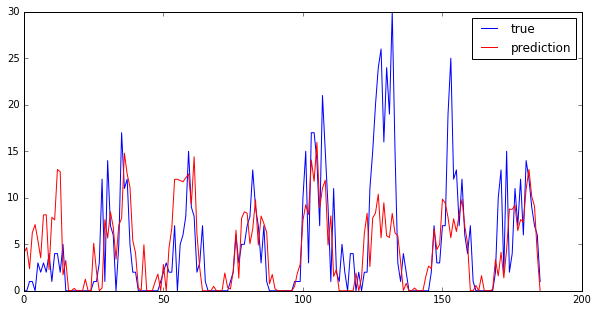

station:  223 15
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.615990844764


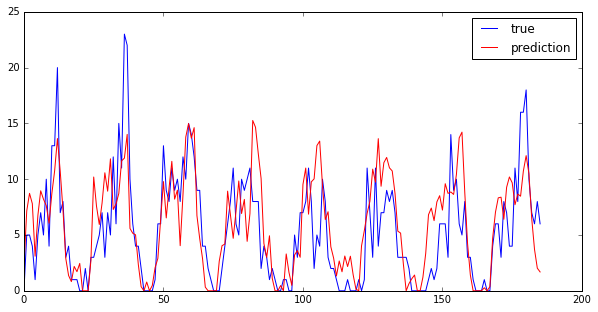

station:  224 16
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.772136023547


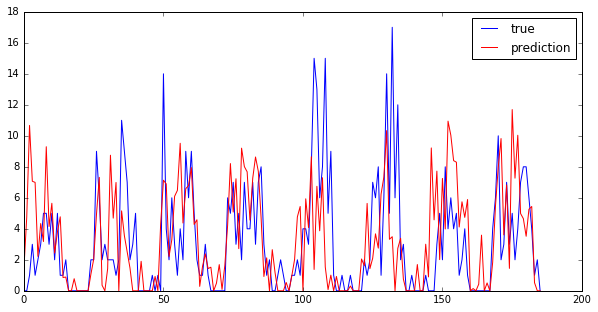

station:  228 17
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.872375312393


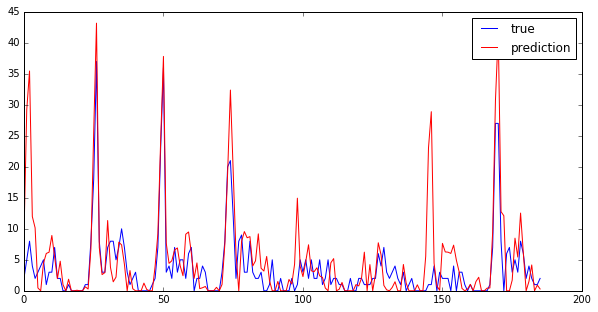

station:  229 18
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.606739167985


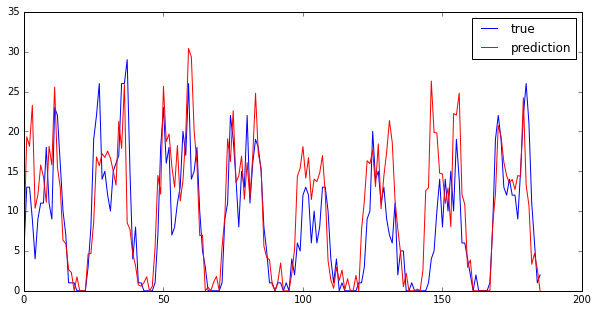

station:  236 19
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.719075303316


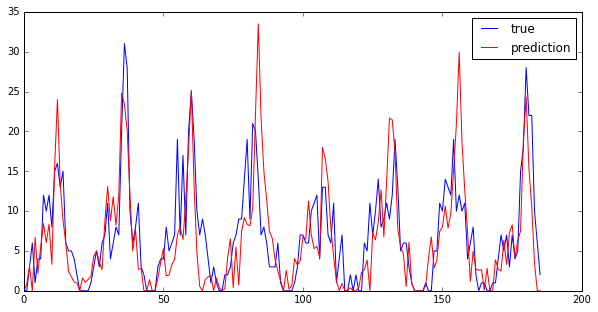

station:  237 20
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.598971470335


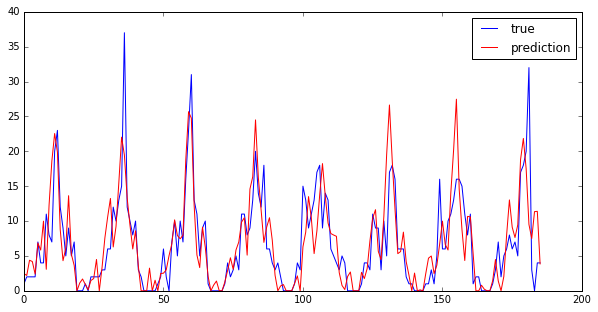

station:  238 21
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.649776558598


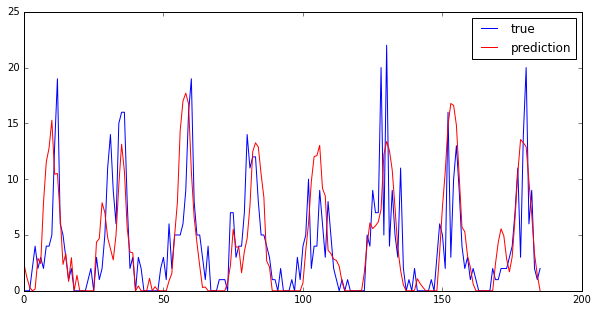

station:  247 22
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.612600043094


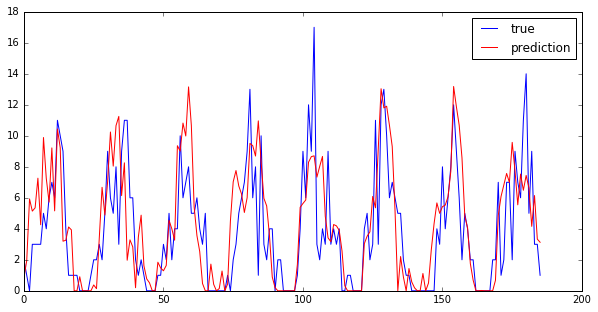

station:  250 23
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.619995056344


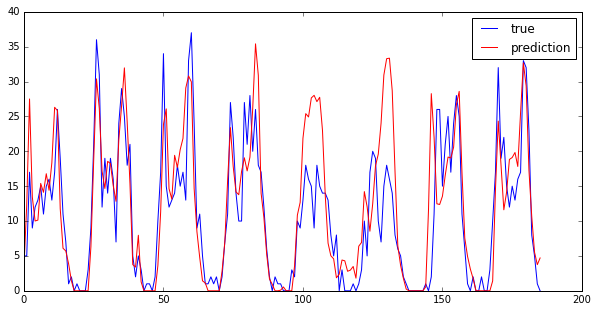

station:  251 24
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.661832774157


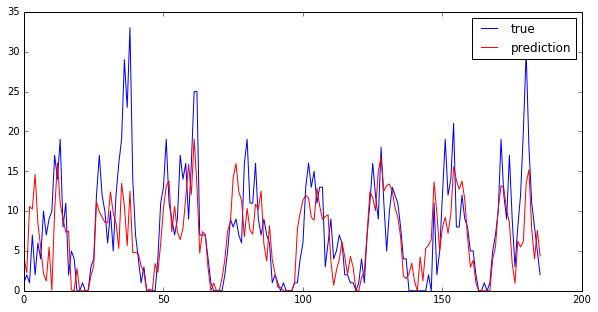

station:  252 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.592164966754
station:  254 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.659900765681
station:  257 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.847638970487
station:  258 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.619345135418
station:  263 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.599355578304
station:  265 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.598851653
station:  267 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.825188080566
station:  276 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.778281557156
station:  281 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.843004073606
station:  284 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.724120459307
station:  285 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.644229951149
station:  291 25
558 744 2016-05-24 06:00:00 2016-05-31 23:00:00
0.561023099119
station:  293 25
558 744 2016-05-24 06:00:0

KeyboardInterrupt: 

In [69]:
rmses_stat_in = {}
in_stat_vals = {}
count = 0
for s in stations:
    print("station: ", s, count)
    station = grouped_station_in.loc[grouped_station_in["end station id"] == s,]
    preds, gold, rmse = do_ar_regression_station(station, 1, .75, True)
    rmses_stat_in[s] = rmse
    in_stat_vals[s] = (preds, gold)
    if count < 25:
        plot_ar_regression(preds, gold)
        count = count + 1

In [48]:
def getHourlyRatesStation(in_rates, out_rates, cluster):
    #station_id,weekday,hour,avg(out_count),avg(in_count)
    # times index has time were trying to predict
    #print(in_rates.index)
    vals = []
    for i in range(0, len(in_rates)):
        #vals.append({})
        print(in_rates[i], out_rates[i])
        vals.append({"station":cluster, "hour":in_rates.index[i].hour, "weekday":in_rates.index[i].weekday(), "in_rate" :in_rates[i], "out_rate":out_rates[i]})
    #print(vals)
    
    return pd.DataFrame(vals)

station_frames = []

for s in stations:
    print(s)
    station_frames.append(getHourlyRatesStation(in_stat_vals[s][0] ,out_stat_vals[s][0], s))

79
0.0 0.849463679145
6.23879613007 0.0
23.4915047885 6.42836122661
16.443984138 5.55558241736
8.58571933363 4.03349551297
4.91568152081 5.59798680193
5.60412548584 4.2448440245
9.393588886 4.0931368364
9.95839249522 0.834478747197
6.86461610815 6.84320771759
1.89563605739 0.528487885333
4.58589626948 7.19414294307
0.374445115487 13.9380754104
2.82403289978 9.12187667683
1.58811252101 7.45039215855
1.22471557685 2.48724574369
0.749873387279 4.30463704238
0.0 3.01881455846
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
5.35439917524 0.0
17.2113770479 1.29479114757
13.3663911263 0.450036423473
9.99539182337 4.85031215335
6.96137258272 4.66508320998
8.89676670021 1.96819563297
9.32198316135 6.94775969539
4.40735045785 8.61476650521
9.64956814157 0.184787824525
5.9471985171 6.12788815634
6.14484379225 7.30250852989
5.65848819225 11.3402778043
3.62321851164 9.25913707271
0.0 5.61961441271
0.0 6.18336780276
0.0 5.89452313908
0.0 0.892686245467
0.0 0.410929269626
0.35105681742 0.3162

In [56]:
station_rates = pd.concat(station_frames, axis=0)
print(station_rates.shape)
station_rates = station_rates.drop_duplicates(['station', 'hour', 'weekday'])
print(station_rates.shape)
station_rates.rename(columns={"station":"station_id", "in_rate":"avg(in_count)", "out_rate":"avg(out_count)"}, inplace=True)

(88350, 5)
(79800, 5)


In [57]:
station_rates.head()

hour  avg(in_count)  avg(out_count)  station_id  weekday
0     6       0.000000        0.849464          79        1
1     7       6.238796        0.000000          79        1
2     8      23.491505        6.428361          79        1
3     9      16.443984        5.555582          79        1
4    10       8.585719        4.033496          79        1

In [60]:
len(station_rates.station_id.unique())

475

In [62]:
station_rates.to_csv("poisson_station_ar_preds.csv", index=False)

In [68]:
np.mean(list(rmses_stat_in.values()) + list(rmses_stat_out.values()))

0.75689116969750814

In [67]:
np.mean()

0.76893904313383465